In [439]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

In [440]:
#查找预测集是否有重复值
df1=pd.read_excel("data/df1.xlsx")
bh=df1.duplicated(['机器编号'],keep=False)
gf=df.duplicated(['统一规范代码'],keep=False)
import collections
countp11=collections.Counter(bh)
countp12=collections.Counter(gf)
print(countp11,countp12)
df1

Counter({False: 291, True: 10}) Counter({False: 9000})


,机器编号,统一规范代码,机器质量等级,工厂温度,机器温度,转速（rpm）,扭矩（Nm）,使用时长（min）,是否发生故障,具体故障类别
0,84,L48027,1,296.4,307.4,2833,5.6,213,1,3
1,6986,M15740,2,295.8,306.3,1235,76.2,89,1,3
2,8047,L48083,1,295.7,306.2,2270,14.6,149,1,3
3,6852,M15876,2,296.3,307.2,1319,68.3,24,1,3
4,6723,L48265,1,297.0,307.8,1385,56.4,202,1,4
...,...,...,...,...,...,...,...,...,...,...
296,5212,L56938,1,298.6,309.8,2271,16.2,218,1,1
297,6607,L56944,1,298.5,309.5,1294,66.7,12,1,3
298,2704,L57002,1,298.5,309.4,1360,60.9,187,1,4
299,3919,L57010,1,298.3,309.3,1337,56.1,206,1,4


In [441]:
x=df1[['机器质量等级','工厂温度','机器温度','转速（rpm）','扭矩（Nm）','使用时长（min）']]
y=df1['具体故障类别']
x=np.array(x)
y=np.array(y)

In [442]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10, shuffle=True,random_state=33)
kf.get_n_splits(x)
for train_index, test_index in kf.split(x,y):
    train_index,test_index
#     print('train_index:%s,test_index:%s' %(train_index,test_index))
      

In [443]:
for train_index, test_index in kf.split(x,y):
    x_train=x[train_index]
    y_train=y[train_index]
    x_test=x[test_index]
    y_test=y[test_index]


In [444]:
import collections
countp=collections.Counter(y_test)
countp

Counter({3: 11, 4: 7, 2: 8, 1: 3, 5: 1})

In [482]:
#决策树分类
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_y_pred=dtc.predict(x_test)

In [483]:
#交叉验证准确性平均得分
from sklearn.model_selection import cross_val_score
cross_val_score(dtc,x_train,y_train,cv=10).mean()


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


0.818915343915344

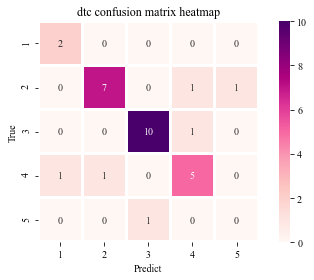

In [484]:
cmdtc=confusion_matrix(dtc_y_pred,y_test)
xticks=[1,2,3,4,5]
yticks=[1,2,3,4,5]
fig,ax=plt.subplots(figsize=(6,4))
ax=sns.heatmap(cmdtc,cmap='RdPu',annot=True,fmt='d',linewidths=2,square=True,xticklabels=xticks,yticklabels=yticks)
ax.set_xlabel("Predict")
ax.set_ylabel("True")
ax.set_title('dtc confusion matrix heatmap')
plt.tight_layout()

In [493]:
#随机森林分类器
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_y_pred=rfc.predict(x_test)
rfc_y_pred

array([3, 3, 4, 3, 3, 3, 4, 4, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 4, 1, 3,
       2, 4, 4, 3, 3, 3, 1, 4], dtype=int64)

In [494]:
#交叉验证准确性平均得分
from sklearn.model_selection import cross_val_score
cross_val_score(rfc,x_train,y_train,cv=10).mean()

D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


0.8817460317460318

In [495]:
#求混淆矩阵
cmrfc=confusion_matrix(rfc_y_pred,y_test)
cmrfc

array([[ 2,  0,  0,  0,  0],
       [ 0,  8,  0,  1,  1],
       [ 0,  0, 11,  0,  0],
       [ 1,  0,  0,  6,  0],
       [ 0,  0,  0,  0,  0]], dtype=int64)

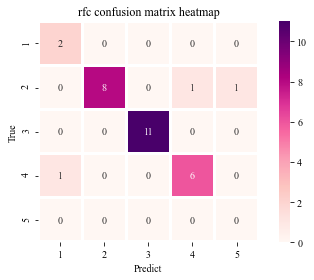

In [496]:
# plt.rcParams['font.family']=['Times New Roman']
xticks=[1,2,3,4,5]
yticks=[1,2,3,4,5]
fig,ax=plt.subplots(figsize=(6,4))
ax=sns.heatmap(cmrfc,cmap='RdPu',annot=True,fmt='d',linewidths=2,square=True,xticklabels=xticks,yticklabels=yticks)
ax.set_xlabel("Predict")
ax.set_ylabel("True")
ax.set_title('rfc confusion matrix heatmap')
plt.tight_layout()


In [452]:
#梯度提升决策树
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_y_pred=gbc.predict(x_test)
gbc_y_pred

array([3, 3, 4, 3, 3, 3, 4, 4, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 4, 1, 3,
       2, 4, 4, 3, 3, 3, 1, 4], dtype=int64)

In [453]:
#交叉验证准确性平均得分
from sklearn.model_selection import cross_val_score
cross_val_score(gbc,x_train,y_train,cv=10).mean()

D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


0.8783068783068784

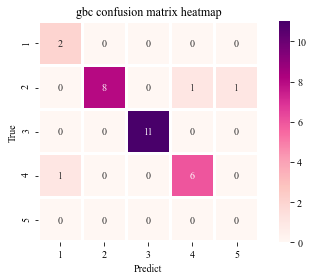

In [454]:
cmgbc=confusion_matrix(gbc_y_pred,y_test)
xticks=[1,2,3,4,5]
yticks=[1,2,3,4,5]
fig,ax=plt.subplots(figsize=(6,4))
ax=sns.heatmap(cmgbc,cmap='RdPu',annot=True,fmt='d',linewidths=2,square=True,xticklabels=xticks,yticklabels=yticks)
ax.set_xlabel("Predict")
ax.set_ylabel("True")
ax.set_title('gbc confusion matrix heatmap')
plt.tight_layout()

In [455]:
#XGBoost模型
xgbc=XGBClassifier()
xgbc.fit(x_train,y_train)
xgbc_y_pred=xgbc.predict(x_test)
xgbc_y_pred

[17:57:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


array([3, 3, 4, 3, 3, 3, 4, 4, 3, 4, 2, 2, 2, 2, 3, 2, 2, 2, 2, 4, 1, 3,
       2, 4, 4, 3, 3, 3, 1, 4], dtype=int64)

In [456]:
#交叉验证准确性平均得分
from sklearn.model_selection import cross_val_score
cross_val_score(xgbc,x_train,y_train,cv=10).mean()


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
D:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:57:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:57:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:57:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:57:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:57:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:57:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:58:00] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:58:00] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:58:00] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:58:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9261904761904761

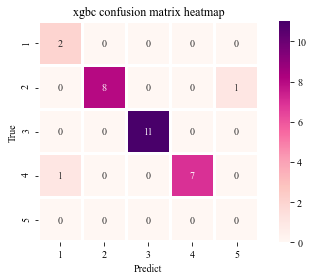

In [457]:
cmxgbc=confusion_matrix(xgbc_y_pred,y_test)
xticks=[1,2,3,4,5]
yticks=[1,2,3,4,5]
fig,ax=plt.subplots(figsize=(6,4))
ax=sns.heatmap(cmxgbc,cmap='RdPu',annot=True,fmt='d',linewidths=2,square=True,xticklabels=xticks,yticklabels=yticks)
ax.set_xlabel("Predict")
ax.set_ylabel("True")
ax.set_title('xgbc confusion matrix heatmap')
plt.tight_layout()

In [458]:
from sklearn.preprocessing import label_binarize
y_test1=label_binarize(y_test,classes=[1,2,3,4,5])
n_classes=y_test1.shape[1]
n_classes

5

D:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:58:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


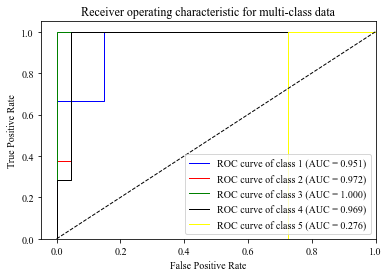

In [459]:
from sklearn.multiclass import OneVsRestClassifier
rfc1=OneVsRestClassifier(DecisionTreeClassifier())
clf=xgbc.fit(x_train,y_train)
y_prob=clf.predict_proba(x_test)
# print(y_prob)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.rcParams['font.family']=['Times New Roman']
plt.figure()
lw = 1
colors = ['blue', 'red', 'green', 'black', 'yellow']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (AUC = {1:0.3f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [460]:
x_pre1=pd.read_excel('data/x_pre1.xlsx')
x_pre1

,机器编号,统一规范代码,机器质量等级,室温（K）,室温（K）.1,转速（rpm）,扭矩（Nm）,使用时长（min）,是否发生故障
0,9737,L47230,L,298.9,309.1,2861,4.6,143,1
1,9816,L47249,L,298.9,309.0,1410,65.7,191,1
2,9868,L47340,L,298.4,308.2,1282,60.7,216,1
3,9276,L47348,L,298.4,308.3,1433,62.3,20,1
4,9968,M15054,M,298.2,308.5,2678,10.7,86,1
5,9587,L47422,L,298.0,308.2,1348,58.8,202,1
6,9404,L47428,L,298.0,308.3,1362,56.8,216,1
7,9618,L47429,L,298.0,308.3,1405,56.2,218,1
8,9198,M15119,M,298.1,308.2,1420,63.9,19,1
9,9887,L47507,L,297.7,308.5,1373,56.7,203,1


In [461]:
x_pre2=x_pre1[['统一规范代码','机器质量等级','室温（K）','室温（K）.1','转速（rpm）','扭矩（Nm）','使用时长（min）']]
x_pre2.index=x_pre2['统一规范代码']
x_pre2=x_pre2.drop('统一规范代码',axis=1)
dengji={'L':1,'M':2,'H':3}
x_pre2['机器质量等级']=x_pre2['机器质量等级'].map(dengji)
x_pre2

,机器质量等级,室温（K）,室温（K）.1,转速（rpm）,扭矩（Nm）,使用时长（min）
统一规范代码,,,,,,
L47230,1,298.9,309.1,2861,4.6,143
L47249,1,298.9,309.0,1410,65.7,191
L47340,1,298.4,308.2,1282,60.7,216
L47348,1,298.4,308.3,1433,62.3,20
M15054,2,298.2,308.5,2678,10.7,86
L47422,1,298.0,308.2,1348,58.8,202
L47428,1,298.0,308.3,1362,56.8,216
L47429,1,298.0,308.3,1405,56.2,218
M15119,2,298.1,308.2,1420,63.9,19


In [462]:
rfc_pre=xgbc.predict(x_pre2)
rfc_pre

array([3, 4, 4, 3, 3, 4, 4, 4, 3, 4, 3, 4, 3, 1, 3, 4, 4, 2, 2, 2, 2],
      dtype=int64)

In [463]:
import collections
countp=collections.Counter(rfc_pre)
countp

Counter({3: 7, 4: 9, 1: 1, 2: 4})

In [464]:
x_pre1['具体故障类别']=rfc_pre
x_pre1

,机器编号,统一规范代码,机器质量等级,室温（K）,室温（K）.1,转速（rpm）,扭矩（Nm）,使用时长（min）,是否发生故障,具体故障类别
0,9737,L47230,L,298.9,309.1,2861,4.6,143,1,3
1,9816,L47249,L,298.9,309.0,1410,65.7,191,1,4
2,9868,L47340,L,298.4,308.2,1282,60.7,216,1,4
3,9276,L47348,L,298.4,308.3,1433,62.3,20,1,3
4,9968,M15054,M,298.2,308.5,2678,10.7,86,1,3
5,9587,L47422,L,298.0,308.2,1348,58.8,202,1,4
6,9404,L47428,L,298.0,308.3,1362,56.8,216,1,4
7,9618,L47429,L,298.0,308.3,1405,56.2,218,1,4
8,9198,M15119,M,298.1,308.2,1420,63.9,19,1,3
9,9887,L47507,L,297.7,308.5,1373,56.7,203,1,4


In [465]:
result1=pd.read_excel('data/result1.xlsx')
result1

,机器编号,统一规范代码,机器质量等级,室温（K）,室温（K）.1,转速（rpm）,扭矩（Nm）,使用时长（min）,是否发生故障
0,9125,M14860,M,298.1,308.6,1551,42.8,0,0
1,9401,L47181,L,298.2,308.7,1408,46.3,3,0
2,9566,L47182,L,298.1,308.5,1498,49.4,5,0
3,9296,L47183,L,298.2,308.6,1433,39.5,7,0
4,9376,L47184,L,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...,...,...
995,9244,H33243,H,302.3,310.9,1366,48.4,130,1
996,9173,H33492,H,302.1,310.7,1294,62.4,101,0
997,9057,L51260,L,302.0,310.4,1357,58.0,108,1
998,9552,L51261,L,302.0,310.4,1336,58.2,110,1


In [466]:
result=pd.merge(result1,x_pre1,how='left')
result

,机器编号,统一规范代码,机器质量等级,室温（K）,室温（K）.1,转速（rpm）,扭矩（Nm）,使用时长（min）,是否发生故障,具体故障类别
0,9125,M14860,M,298.1,308.6,1551,42.8,0,0,NaN
1,9401,L47181,L,298.2,308.7,1408,46.3,3,0,NaN
2,9566,L47182,L,298.1,308.5,1498,49.4,5,0,NaN
3,9296,L47183,L,298.2,308.6,1433,39.5,7,0,NaN
4,9376,L47184,L,298.2,308.7,1408,40.0,9,0,NaN
...,...,...,...,...,...,...,...,...,...,...
995,9244,H33243,H,302.3,310.9,1366,48.4,130,1,2.0
996,9173,H33492,H,302.1,310.7,1294,62.4,101,0,NaN
997,9057,L51260,L,302.0,310.4,1357,58.0,108,1,2.0
998,9552,L51261,L,302.0,310.4,1336,58.2,110,1,2.0


In [467]:
result['具体故障类别']=result['具体故障类别'].fillna(0)
result

,机器编号,统一规范代码,机器质量等级,室温（K）,室温（K）.1,转速（rpm）,扭矩（Nm）,使用时长（min）,是否发生故障,具体故障类别
0,9125,M14860,M,298.1,308.6,1551,42.8,0,0,0.0
1,9401,L47181,L,298.2,308.7,1408,46.3,3,0,0.0
2,9566,L47182,L,298.1,308.5,1498,49.4,5,0,0.0
3,9296,L47183,L,298.2,308.6,1433,39.5,7,0,0.0
4,9376,L47184,L,298.2,308.7,1408,40.0,9,0,0.0
...,...,...,...,...,...,...,...,...,...,...
995,9244,H33243,H,302.3,310.9,1366,48.4,130,1,2.0
996,9173,H33492,H,302.1,310.7,1294,62.4,101,0,0.0
997,9057,L51260,L,302.0,310.4,1357,58.0,108,1,2.0
998,9552,L51261,L,302.0,310.4,1336,58.2,110,1,2.0


In [468]:
fk=result.loc[result['具体故障类别']!=0]
fk.shape

(21, 10)

In [469]:
mapping={0:'Normal',1:'TWF',2:'HDF',3:'PWF',4:'OSF',5:'RNF'}
result['具体故障类别']=result['具体故障类别'].map(mapping)
result

,机器编号,统一规范代码,机器质量等级,室温（K）,室温（K）.1,转速（rpm）,扭矩（Nm）,使用时长（min）,是否发生故障,具体故障类别
0,9125,M14860,M,298.1,308.6,1551,42.8,0,0,Normal
1,9401,L47181,L,298.2,308.7,1408,46.3,3,0,Normal
2,9566,L47182,L,298.1,308.5,1498,49.4,5,0,Normal
3,9296,L47183,L,298.2,308.6,1433,39.5,7,0,Normal
4,9376,L47184,L,298.2,308.7,1408,40.0,9,0,Normal
...,...,...,...,...,...,...,...,...,...,...
995,9244,H33243,H,302.3,310.9,1366,48.4,130,1,HDF
996,9173,H33492,H,302.1,310.7,1294,62.4,101,0,Normal
997,9057,L51260,L,302.0,310.4,1357,58.0,108,1,HDF
998,9552,L51261,L,302.0,310.4,1336,58.2,110,1,HDF


In [498]:
result.to_excel('forecast.xlsx',index=False)#结果表格